## Data Notes
https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Week-Ending-D/r8kw-7aab
The link contains more information about this dataset including what each column means.

It should also be noted that the dataset used was last updated on March 22, 2021.

In [12]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Provisional_COVID-19_Death_Counts_by_Week_Ending_Date_and_State.csv')

In [9]:
df

,Data as of,Start Date,End Date,Group,Year,Month,MMWR Week,Week Ending Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,03/22/2021,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,3.0,60167.0,98.0,4107.0,3.0,434.0,4541.0,NaN
1,03/22/2021,01/05/2020,01/11/2020,By Week,2020,NaN,2.0,01/11/2020,United States,0.0,60717.0,97.0,4153.0,0.0,474.0,4627.0,NaN
2,03/22/2021,01/12/2020,01/18/2020,By Week,2020,NaN,3.0,01/18/2020,United States,3.0,59348.0,97.0,4063.0,2.0,467.0,4531.0,NaN
3,03/22/2021,01/19/2020,01/25/2020,By Week,2020,NaN,4.0,01/25/2020,United States,1.0,59147.0,99.0,3917.0,0.0,499.0,4417.0,NaN
4,03/22/2021,01/26/2020,02/01/2020,By Week,2020,NaN,5.0,02/01/2020,United States,0.0,58811.0,99.0,3817.0,0.0,481.0,4298.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,03/22/2021,01/01/2020,03/20/2021,By Total,NaN,NaN,NaN,NaN,Washington,4785.0,74545.0,NaN,6176.0,2627.0,161.0,8489.0,NaN
4424,03/22/2021,01/01/2020,03/20/2021,By Total,NaN,NaN,NaN,NaN,West Virginia,2474.0,27058.0,NaN,2792.0,1205.0,68.0,4129.0,NaN
4425,03/22/2021,01/01/2020,03/20/2021,By Total,NaN,NaN,NaN,NaN,Wisconsin,7726.0,73555.0,NaN,5304.0,2470.0,171.0,10727.0,NaN
4426,03/22/2021,01/01/2020,03/20/2021,By Total,NaN,NaN,NaN,NaN,Wyoming,608.0,6507.0,NaN,598.0,274.0,10.0,942.0,NaN


As can be seen below, we have 12 columns with null values:
* year
* month
* MMWR week
* week ending date
* COVID-19 deaths
* total deaths
* percent of expected deaths
* pneumonia deaths
* pneumonia and COVID-19 deaths
* influenza deaths
* pneumonia, influenza, or COVID-19 deaths
* footnote

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4428 entries, 0 to 4427
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data as of                                4428 non-null   object 
 1   Start Date                                4428 non-null   object 
 2   End Date                                  4428 non-null   object 
 3   Group                                     4428 non-null   object 
 4   Year                                      4374 non-null   object 
 5   Month                                     810 non-null    float64
 6   MMWR Week                                 3456 non-null   float64
 7   Week Ending Date                          3456 non-null   object 
 8   State                                     4428 non-null   object 
 9   COVID-19 Deaths                           3970 non-null   float64
 10  Total Deaths                        

I find it interesting that we have null values in month, year, and week ending date since all that information is listed arleady in the dataset. I suppose it was skipped over for that reason. It is interesting that there are so many columns that are essentially repeats. This is not something that you'd really see in a good database table.

I don't really understand what MMWR week means and it really isn't explained, so this is something I'll have to look up, but I think it's unlikely that I'll need this piece of data.

For percent of expected deaths, I also wonder what this means. Is this the percent of expected COVID deaths? Also, why is it expected deaths and not just deaths? This indicates that there is an unknown factor. Is this expected deaths in the future, and if so, how far in the future? Or is the total death count (death by anything) in the dataset not yet official at the time of reporting?

Lastly, I'm interested in what exactly is in the footnotes since about half of all rows have a footnote.

In [5]:
df.isnull().sum()

Data as of                                     0
Start Date                                     0
End Date                                       0
Group                                          0
Year                                          54
Month                                       3618
MMWR Week                                    972
Week Ending Date                             972
State                                          0
COVID-19 Deaths                              458
Total Deaths                                   7
Percent of Expected Deaths                    54
Pneumonia Deaths                             280
Pneumonia and COVID-19 Deaths                706
Influenza Deaths                            1454
Pneumonia, Influenza, or COVID-19 Deaths     201
Footnote                                    2218
dtype: int64

In [7]:
df.isnull().sum().sum()

10994

Generally, it seems that .describe() isn't useful.

In [6]:
df.describe()

,Month,MMWR Week,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
count,810.000000,3456.000000,3970.000000,4.421000e+03,4374.000000,4148.000000,3722.000000,2974.000000,4227.000000
mean,5.600000,23.390625,1054.518136,7.292499e+03,110.712163,873.287126,546.423428,23.055817,1380.936598
std,3.594805,16.073084,11150.973974,8.251202e+04,34.591030,9433.547280,5586.067531,250.674061,15069.534074
min,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,8.750000,19.000000,4.370000e+02,101.000000,45.000000,11.000000,0.000000,59.000000
50%,5.000000,21.500000,87.000000,1.090000e+03,111.000000,102.000000,43.000000,0.000000,147.000000
75%,9.000000,37.250000,304.000000,2.418000e+03,123.000000,274.000000,157.000000,0.000000,431.500000
max,12.000000,53.000000,522567.000000,4.007602e+06,737.000000,450241.000000,253918.000000,8993.000000,726649.000000


In [10]:
df

,Data as of,Start Date,End Date,Group,Year,Month,MMWR Week,Week Ending Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,03/22/2021,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,3.0,60167.0,98.0,4107.0,3.0,434.0,4541.0,NaN
1,03/22/2021,01/05/2020,01/11/2020,By Week,2020,NaN,2.0,01/11/2020,United States,0.0,60717.0,97.0,4153.0,0.0,474.0,4627.0,NaN
2,03/22/2021,01/12/2020,01/18/2020,By Week,2020,NaN,3.0,01/18/2020,United States,3.0,59348.0,97.0,4063.0,2.0,467.0,4531.0,NaN
3,03/22/2021,01/19/2020,01/25/2020,By Week,2020,NaN,4.0,01/25/2020,United States,1.0,59147.0,99.0,3917.0,0.0,499.0,4417.0,NaN
4,03/22/2021,01/26/2020,02/01/2020,By Week,2020,NaN,5.0,02/01/2020,United States,0.0,58811.0,99.0,3817.0,0.0,481.0,4298.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,03/22/2021,01/01/2020,03/20/2021,By Total,NaN,NaN,NaN,NaN,Washington,4785.0,74545.0,NaN,6176.0,2627.0,161.0,8489.0,NaN
4424,03/22/2021,01/01/2020,03/20/2021,By Total,NaN,NaN,NaN,NaN,West Virginia,2474.0,27058.0,NaN,2792.0,1205.0,68.0,4129.0,NaN
4425,03/22/2021,01/01/2020,03/20/2021,By Total,NaN,NaN,NaN,NaN,Wisconsin,7726.0,73555.0,NaN,5304.0,2470.0,171.0,10727.0,NaN
4426,03/22/2021,01/01/2020,03/20/2021,By Total,NaN,NaN,NaN,NaN,Wyoming,608.0,6507.0,NaN,598.0,274.0,10.0,942.0,NaN


In [20]:
df['Start Date'] = pd.to_datetime(df['Start Date'])
df_sorted = df.sort_values(by = ['Start Date'])

In [21]:
df_sorted

,Data as of,Start Date,End Date,Group,Year,Month,MMWR Week,Week Ending Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,03/22/2021,2019-12-29,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,3.0,60167.0,98.0,4107.0,3.0,434.0,4541.0,NaN
2048,03/22/2021,2019-12-29,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,New Mexico,0.0,406.0,103.0,27.0,0.0,NaN,36.0,One or more data cells have counts between 1-9...
2112,03/22/2021,2019-12-29,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,New York,0.0,2164.0,100.0,211.0,0.0,16.0,227.0,NaN
2176,03/22/2021,2019-12-29,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,New York City,0.0,1155.0,93.0,83.0,0.0,16.0,99.0,NaN
2240,03/22/2021,2019-12-29,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,North Carolina,0.0,2003.0,99.0,123.0,0.0,10.0,133.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,03/22/2021,2021-03-14,03/20/2021,By Week,2021,NaN,11.0,03/20/2021,Wisconsin,NaN,116.0,11.0,NaN,NaN,0.0,NaN,One or more data cells have counts between 1-9...
2559,03/22/2021,2021-03-14,03/20/2021,By Week,2021,NaN,11.0,03/20/2021,Oregon,0.0,53.0,7.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1-9...
1535,03/22/2021,2021-03-14,03/20/2021,By Week,2021,NaN,11.0,03/20/2021,Michigan,18.0,304.0,15.0,14.0,NaN,0.0,25.0,One or more data cells have counts between 1-9...
703,03/22/2021,2021-03-14,03/20/2021,By Week,2021,NaN,11.0,03/20/2021,Florida,55.0,565.0,13.0,64.0,40.0,0.0,79.0,NaN


In [34]:
df_US = df.loc[df['State'] == 'United States']

In [29]:
df_US

,Data as of,Start Date,End Date,Group,Year,Month,MMWR Week,Week Ending Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,03/22/2021,2019-12-29,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,3.0,60167.0,98.0,4107.0,3.0,434.0,4541.0,NaN
1,03/22/2021,2020-01-05,01/11/2020,By Week,2020,NaN,2.0,01/11/2020,United States,0.0,60717.0,97.0,4153.0,0.0,474.0,4627.0,NaN
2,03/22/2021,2020-01-12,01/18/2020,By Week,2020,NaN,3.0,01/18/2020,United States,3.0,59348.0,97.0,4063.0,2.0,467.0,4531.0,NaN
3,03/22/2021,2020-01-19,01/25/2020,By Week,2020,NaN,4.0,01/25/2020,United States,1.0,59147.0,99.0,3917.0,0.0,499.0,4417.0,NaN
4,03/22/2021,2020-01-26,02/01/2020,By Week,2020,NaN,5.0,02/01/2020,United States,0.0,58811.0,99.0,3817.0,0.0,481.0,4298.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3469,03/22/2021,2021-02-01,02/28/2021,By Month,2021,2.0,NaN,NaN,United States,39944.0,229873.0,98.0,30908.0,21628.0,70.0,49270.0,NaN
3470,03/22/2021,2021-03-01,03/20/2021,By Month,2021,3.0,NaN,NaN,United States,6585.0,65686.0,26.0,6139.0,3505.0,15.0,9229.0,NaN
4266,03/22/2021,2020-01-01,12/31/2020,By Year,2020,NaN,NaN,NaN,United States,378831.0,3365390.0,118.0,348301.0,177236.0,8775.0,557525.0,NaN
4267,03/22/2021,2021-01-01,03/20/2021,By Year,2021,NaN,NaN,NaN,United States,143736.0,642212.0,23.0,101940.0,76682.0,218.0,169124.0,NaN


In [37]:
US_df = pd.DataFrame(df_US)

In [39]:
US_df

,Data as of,Start Date,End Date,Group,Year,Month,MMWR Week,Week Ending Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,03/22/2021,2019-12-29,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,3.0,60167.0,98.0,4107.0,3.0,434.0,4541.0,NaN
1,03/22/2021,2020-01-05,01/11/2020,By Week,2020,NaN,2.0,01/11/2020,United States,0.0,60717.0,97.0,4153.0,0.0,474.0,4627.0,NaN
2,03/22/2021,2020-01-12,01/18/2020,By Week,2020,NaN,3.0,01/18/2020,United States,3.0,59348.0,97.0,4063.0,2.0,467.0,4531.0,NaN
3,03/22/2021,2020-01-19,01/25/2020,By Week,2020,NaN,4.0,01/25/2020,United States,1.0,59147.0,99.0,3917.0,0.0,499.0,4417.0,NaN
4,03/22/2021,2020-01-26,02/01/2020,By Week,2020,NaN,5.0,02/01/2020,United States,0.0,58811.0,99.0,3817.0,0.0,481.0,4298.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3469,03/22/2021,2021-02-01,02/28/2021,By Month,2021,2.0,NaN,NaN,United States,39944.0,229873.0,98.0,30908.0,21628.0,70.0,49270.0,NaN
3470,03/22/2021,2021-03-01,03/20/2021,By Month,2021,3.0,NaN,NaN,United States,6585.0,65686.0,26.0,6139.0,3505.0,15.0,9229.0,NaN
4266,03/22/2021,2020-01-01,12/31/2020,By Year,2020,NaN,NaN,NaN,United States,378831.0,3365390.0,118.0,348301.0,177236.0,8775.0,557525.0,NaN
4267,03/22/2021,2021-01-01,03/20/2021,By Year,2021,NaN,NaN,NaN,United States,143736.0,642212.0,23.0,101940.0,76682.0,218.0,169124.0,NaN


In [41]:
US_df['End Date'] = pd.to_datetime(US_df['End Date'])
df_sorted_US = US_df.sort_values(by = ['End Date'])

In [42]:
df_sorted_US

,Data as of,Start Date,End Date,Group,Year,Month,MMWR Week,Week Ending Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,03/22/2021,2019-12-29,2020-01-04,By Week,2019/2020,NaN,1.0,01/04/2020,United States,3.0,60167.0,98.0,4107.0,3.0,434.0,4541.0,NaN
1,03/22/2021,2020-01-05,2020-01-11,By Week,2020,NaN,2.0,01/11/2020,United States,0.0,60717.0,97.0,4153.0,0.0,474.0,4627.0,NaN
2,03/22/2021,2020-01-12,2020-01-18,By Week,2020,NaN,3.0,01/18/2020,United States,3.0,59348.0,97.0,4063.0,2.0,467.0,4531.0,NaN
3,03/22/2021,2020-01-19,2020-01-25,By Week,2020,NaN,4.0,01/25/2020,United States,1.0,59147.0,99.0,3917.0,0.0,499.0,4417.0,NaN
3456,03/22/2021,2020-01-01,2020-01-31,By Month,2020,1.0,NaN,NaN,United States,7.0,264606.0,98.0,17905.0,5.0,2122.0,20029.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,03/22/2021,2021-03-07,2021-03-13,By Week,2021,NaN,10.0,03/13/2021,United States,2546.0,27408.0,47.0,2369.0,1334.0,4.0,3583.0,NaN
3470,03/22/2021,2021-03-01,2021-03-20,By Month,2021,3.0,NaN,NaN,United States,6585.0,65686.0,26.0,6139.0,3505.0,15.0,9229.0,NaN
63,03/22/2021,2021-03-14,2021-03-20,By Week,2021,NaN,11.0,03/20/2021,United States,597.0,6655.0,12.0,590.0,302.0,0.0,885.0,NaN
4267,03/22/2021,2021-01-01,2021-03-20,By Year,2021,NaN,NaN,NaN,United States,143736.0,642212.0,23.0,101940.0,76682.0,218.0,169124.0,NaN


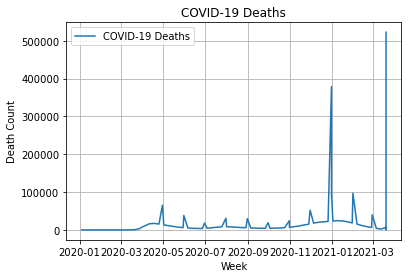

<Figure size 720x360 with 0 Axes>

In [43]:
plt.plot(df_sorted_US['End Date'], df_sorted_US['COVID-19 Deaths'], label = 'COVID-19 Deaths')
#plt.plot(df['End Date'], df['Pneumonia Deaths'], marker = 'o', label = 'Pneumonia Deaths')
#plt.plot(df['End Date'], df['Influenza Deaths'], marker = 'o', label = 'Influenza Deaths')
plt.xlabel('Week')
plt.ylabel('Death Count')
plt.title('COVID-19 Deaths')
plt.grid(True)
plt.legend()
plt.figure(figsize = (10, 5))

#plt.savefig('IL_unemployment_comparison_2019-2020.png', dpi=300, bbox_inches='tight')
plt.show()